maptiles
===========
Create map images and use as plot background.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## Illustrative examples

### Map image on matplotlib axes

- `draw_map((lon1, lat1, lon2, lat2))` draws the map image of the specified rectangle behind the matplotlib axes.
- The function returns a tuple of an `Axes` (the same object if `ax` argument is supplied) and `AxesImage` object of the map image.
- Visualizations can be added further using the matplotlib features.

**Remarks:**

- Longitude and latitudes must be given in angles. Internally longitudes are converted to `[-180 to 180)` scale. Latitudes must be in `[-L, L]` with `L=85.0511287798`. This `L` is the north and south limit of Web Mercator projection.
- Zoom level is automatically chosen by heuristic calculation. The `z` option allows for explicit specification.
- Aspect ratio is automatically adjusted by heuristic calculation. The `aspect` option allows for explicit specification.
- If `ax` is not given, then a new axes is created internally.
- The axes will be scaled by Web Mercator formula comaptible with the image.

Zoom level 18 is chosen


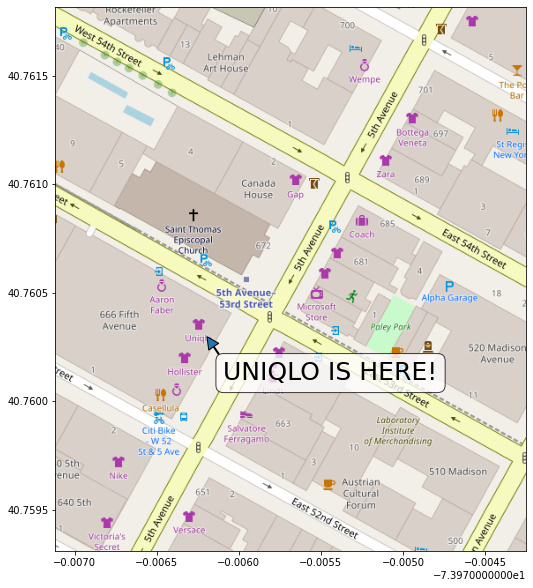

In [2]:
from maptiles import draw_map

# 5th Avenue in Manhattan, New York
bounds = [286.02288365364075, 40.761816905893156, 286.0257428884506, 40.7593098808893]
fig, ax = plt.subplots(figsize=(10, 10))
draw_map(bounds, ax=ax)

uniqlo = [286.02380633354187, 40.76029726182907]
uniqlo[0] -= 360
arrow_from = uniqlo[0] + 0.0001, uniqlo[1] - 0.0002
ax.annotate("UNIQLO IS HERE!", uniqlo, xytext=arrow_from, fontsize=25,
            bbox={"facecolor": "white", "alpha":0.75, "boxstyle":"round"}, arrowprops={"width":1})
None

Zoom level 17 is chosen


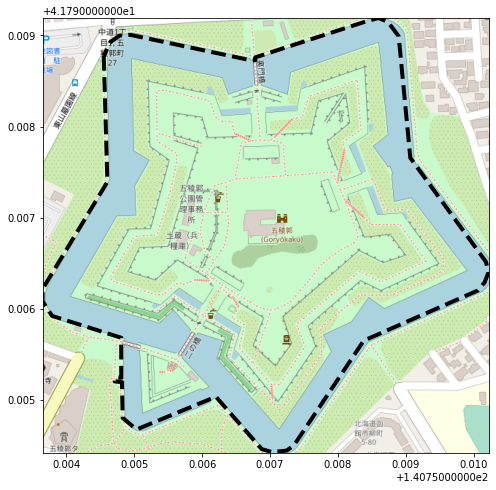

In [3]:
# Goryokaku Castle in Hokkaido, Japan
goryokaku = [[140.7545506954193, 41.79877552882002], [140.7546043395996, 41.797391817910004], [140.7536494731903, 41.7962160400744],
             [140.7536494731903, 41.79608006437536], [140.75378894805905, 41.79592009259535], [140.75480818748474, 41.79568013417667],
             [140.75480818748474, 41.79524020807576], [140.75473308563232, 41.79524820675909], [140.7547116279602, 41.79520021464413],
             [140.7548189163208, 41.79519221595479], [140.75482964515686, 41.7948002789552], [140.755033493042, 41.79467229900768],
             [140.75620293617249, 41.79503224195874], [140.75687885284424, 41.794456332266776], [140.75702905654907, 41.79442433713216],
             [140.75724363327026, 41.79444033470147], [140.75735092163086, 41.79449632616259], [140.75838088989255, 41.795648139652975],
             [140.76006531715393, 41.79620004294831], [140.76016187667847, 41.796288027092395], [140.76021552085876, 41.79639200819787],
             [140.7601833343506, 41.79651198618687], [140.75906753540036, 41.7976557650716], [140.75889587402344, 41.79899148100668],
             [140.75873494148254, 41.79915144512023], [140.75859546661377, 41.79919143608624], [140.7584023475647, 41.79915144512023],
             [140.7567822933197, 41.798759532332795], [140.7567822933197, 41.79872753934637], [140.75671792030334, 41.79872753934637],
             [140.75493693351746, 41.79900747743603], [140.75478672981262, 41.79899947922184], [140.75464725494385, 41.798927495249465],
             [140.7545506954193, 41.79877552882002]]
lons, lats = zip(*goryokaku)
bounds = min(lons), max(lats), max(lons), min(lats)
fig, ax = plt.subplots(figsize=(8, 8))
draw_map(bounds, ax=ax)

ax.plot(lons, lats, c="black", linewidth=4, linestyle="dashed")
None

Zoom level 15 is chosen


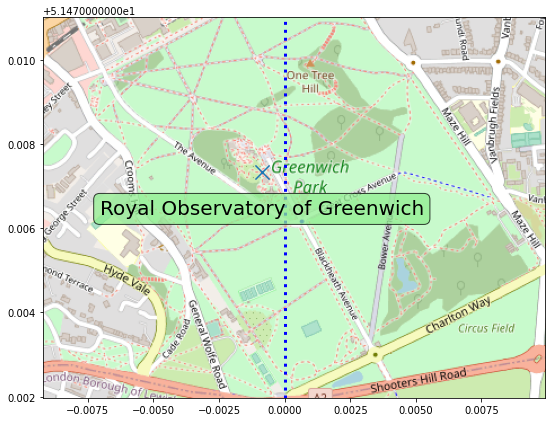

In [4]:
# Royal observatory of Greenwich
bounds = (-0.0092, 51.481, 0.0099, 51.472)
fig, ax = plt.subplots(figsize=(9, 7.2))
draw_map(bounds, ax=ax)

observatory = (-0.0008717179298400879, 51.47732699342673)
ax.scatter(*observatory, marker="x", s=200)
ax.axvline(x=0, linestyle="dotted", linewidth=3, c="blue")
ax.text(observatory[0], observatory[1]-0.001, "Royal Observatory of Greenwich", ha="center",
        fontsize=20, bbox={"facecolor":"lightgreen", "alpha":0.75, "boxstyle":"round"})
None

## Obtain the image data as array

- `get_maparray((lon1, lat1, lon2, lat2))` returns:
    - The RGB image data as numpy array of shape (height, height, 3).
    - Tuple of `(xmin, xmax, ymin, ymax)` defining the area covered by the image.

(338, 446, 3)
(-0.009226799011230469, 0.009913444519042969, 51.47197425351887, 51.481008725784044)


Zoom level 15 is chosen


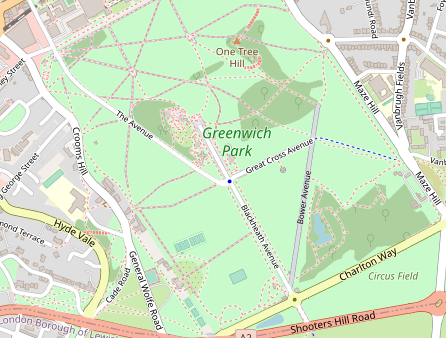

In [5]:
from maptiles import get_maparray
# Royal observatory of Greenwich, again
bounds = (-0.0092, 51.481, 0.0099, 51.472)
img, extent = get_maparray(bounds)

print(img.shape)
print(extent)
Image.fromarray(img)

## Tiles

### Predefined tiles

- This package defines a number of map tiles for the convenience.
- The available tiles are given by the `predefined_tiles` function.
- `get_tile` function returns the predefined tile object (a named tuple).
- The `tile` option of `draw_map` and `get_maparray` accepts one of:
    - Names of predefined tiles.
    - URL string with `{z}`, `{x}`, `{y}` format parameters.
    - Tile object.

In [6]:
from maptiles import predefined_tiles, get_tile

list(predefined_tiles().keys())
get_tile("osm")

Tile(name='OpenStreetMap, Standard', baseurl='https://tile.openstreetmap.org/{z}/{x}/{y}.png', copyright='© OpenStreetMap contributors', copywright_html='&copy; <a href="http://openstreetmap.org">OpenStreetMap</a> contributors')

Zoom level 16 is chosen
Zoom level 16 is chosen


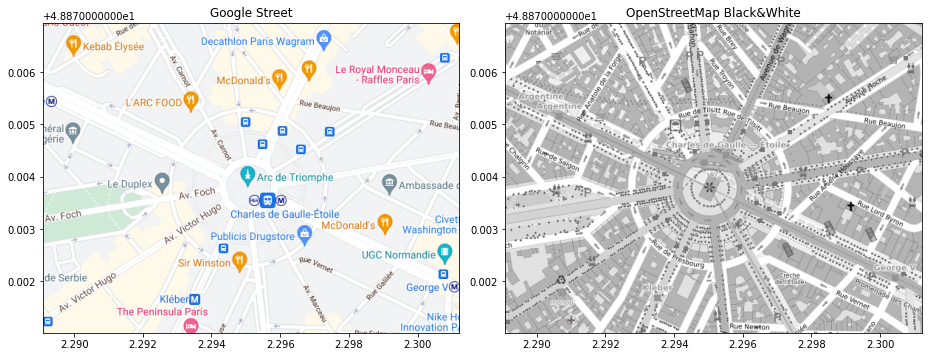

In [7]:
# Arc de Triomphe in Paris
bounds = (2.2890830039978023, 48.87102408096251, 2.301185131072998, 48.87695157541353)
fig, ax = plt.subplots(1, 2, figsize=(13, 6))
draw_map(bounds, ax=ax[0], tile="google_streets")   # tile name
ax[0].set_title("Google Street")

draw_map(bounds, ax=ax[1], tile=get_tile("osm_bw")) # tile object
ax[1].set_title("OpenStreetMap Black&White")
fig.tight_layout()
None

### Copyrights of the map tiles

- This package only provides an interface to access and parse data from map tile servers.
- The map data belong to the providers and they shall be used in compliant with their term of usage.
- Examples of copyright messages are given for predefined tiles (Note: not official one).
- Use `get_tile` function to use them.

In [8]:
from IPython.core.display import HTML

tile = get_tile("osm")
print(tile.copyright)
display(HTML(tile.copywright_html))

tile = get_tile("japangsi")
print(tile.copyright)
display(HTML(tile.copywright_html))

tile = get_tile("google")
print(tile.copyright)
display(HTML(tile.copywright_html))

© OpenStreetMap contributors


© 国土地理院 | Geospatial Information Authority of Japan


© Google


Zoom level 3 is chosen


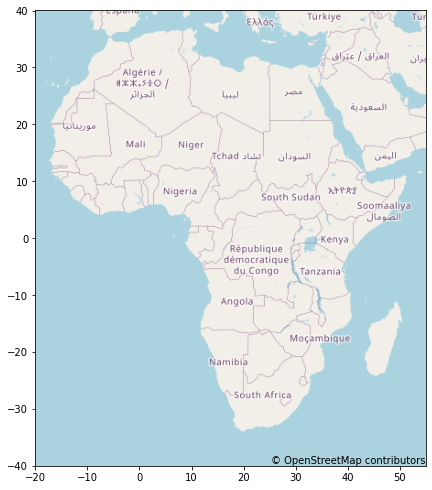

In [9]:
# Add copyright message to the plot
bounds = [-20, 40, 55, -40]
tile = get_tile("osm")
fig, ax = plt.subplots(figsize=(7, 8.5))
draw_map(bounds, ax=ax, tile=tile)
bottom, right = ax.get_ylim()[0], ax.get_xlim()[1]
ax.text(right, bottom, tile.copyright, ha="right", va="bottom")
None

### Custom tiles

- Any tile following the OSM's naming rule can be specified by a URL string with `{x}`, `{y}`, `{z}` parameters.
- Alternatively, a tile object can be created with the `Tile` function.

Zoom level 11 is chosen
Zoom level 11 is chosen


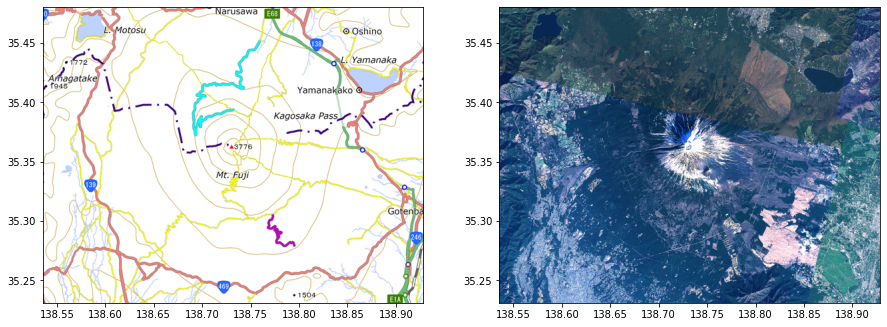

In [10]:
from maptiles import Tile

# Mount Fuji, Japan
bounds = [138.53553771972656, 35.48024245154482, 138.9276123046875, 35.231598543453316]
fig, ax = plt.subplots(1, 2, figsize=(15, 5.6))

draw_map(bounds, ax=ax[0], tile="https://cyberjapandata.gsi.go.jp/xyz/english/{z}/{x}/{y}.png")
draw_map(bounds, ax=ax[1], tile=Tile("https://cyberjapandata.gsi.go.jp/xyz/seamlessphoto/{z}/{x}/{y}.jpg"))
None

## Web Mercator projection

- This package assumes that map tiles are [Web Mercator projected](https://en.wikipedia.org/wiki/Web_Mercator_projection).
- The Web Mercator is a simplified version of Mercator projection and widely used by standard web maps currently, including the Google Map and OpenStreetMap.
- The projection formula is the following:
    $$
    \begin{align}
    x &= \frac{2^{z+7}}{\pi} (\lambda + \pi) \\
    y &= \frac{2^{z+7}}{\pi} \left(\pi - \mathrm{tanh}^{-1}(\mathrm{sin}\; \phi)\right)
    \end{align}
    $$
    where $\lambda, \phi$ are longitude and latitude in radians, and $x, y$ are pixel indices on the web map images.
- Since the latitude conversion is non-linear, simply plotting (lon, lat) as (x, y) coordinates may deviate from the map already in the Web Mercator scale.
- We may think of following three strategies to this issue:
|    | Strategy                                                  | Pros                                         | Cons                                                           | Parameters to draw_map         |
|----|-----------------------------------------------------------|----------------------------------------------|----------------------------------------------------------------|---------------------|
| 1. | Plot lon-lat as-is on the same axes as image              | Simple, works okay for small maps            | Points deviate for large maps                                  |                     |
| 2. | Plot lon-lat on a separate axes with Web-Mercator scaling | Can plot with lon-lat, works for large maps  | Harder to modify visuals due to multi-layer structure          | `scaling=True`        |
| 3. | Plot after projecting coordinates to Web Mercator scale   | Single layer structure, works for large maps | Extra step for manual projection, axis grids are not intuitive | `extent_crs="webmap"` |
    - Strategy 1 is a simple solution and is recommended if the map area is small and approximation is accepted.
    - Strategy 2 works for large maps and coding syntax stays simple. Customization of the visuals can be harder because the image and main plot objects are on separate layers (axes) that share the same bounds.
    - Strategy 3 also works for large maps. Manual projection can be easily conducted using [pyproj](https://pypi.org/project/pyproj/) or [geopandas](https://pypi.org/project/geopandas/) libraries. The axis ticks are not intuitive, but one may add grid lines manually to achieve the desired visuals.
- Examples below show how these strategies work on a small and a large map area.

Zoom level 16 is chosen
Zoom level 16 is chosen
Zoom level 16 is chosen


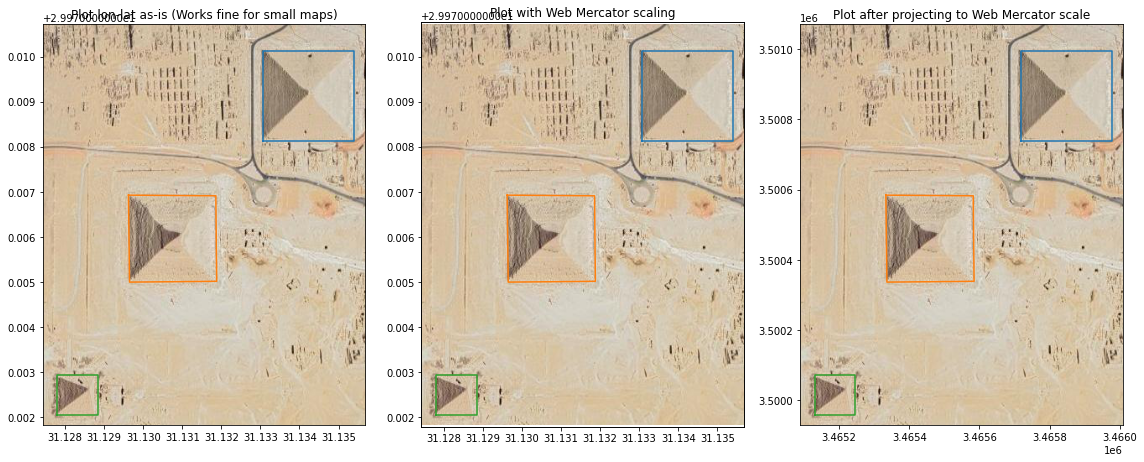

In [11]:
# Small map example
# Giza's pyramid complex
import pyproj
bounds = [31.12743480300903, 29.9806997753276, 31.135662416839596, 29.971834892057622]
pyramids = ([[31.133075952529907, 31.135404109954834, 31.135404109954834, 31.133075952529907, 31.133075952529907],
             [29.978119871578528, 29.978119871578528, 29.980131892318944, 29.980131892318944, 29.978119871578528]], 
            [[31.129621267318726, 31.129648089408878, 31.131879687309265, 31.131858229637146, 31.129621267318726],
             [29.976925650617314, 29.97499720902611, 29.97501579659361, 29.976911710210015, 29.976925650617314]],
            [[31.127794682979587, 31.128843426704407, 31.128843426704407, 31.127794682979587, 31.127794682979587],
             [29.97205568264347, 29.97205568264347, 29.972931643919026, 29.972931643919026, 29.97205568264347]])
def _plot_lines(ax, lines):
    for p in lines:
        ax.plot(p[0], p[1])

fig, ax = plt.subplots(1, 3, figsize=(16, 6.4))

draw_map(bounds, ax=ax[0], tile="google_satellite")
_plot_lines(ax[0], pyramids)
ax[0].set_title("Plot lon-lat as-is (Works fine for small maps)")

draw_map(bounds, ax=ax[1], tile="google_satellite", scaling=True)
_plot_lines(ax[1], pyramids)
ax[1].set_title("Plot with Web Mercator scaling")

draw_map(bounds, ax=ax[2], tile="google_satellite", extent_crs="webmap")
t = pyproj.Transformer.from_crs("EPSG:4326", "EPSG:3857", always_xy=True)
pyramids_scaled = [t.transform(p[0], p[1]) for p in pyramids]
_plot_lines(ax[2], pyramids_scaled)
ax[2].set_title("Plot after projecting to Web Mercator scale")

fig.tight_layout()

epsg:4326


Zoom level 4 is chosen
Zoom level 4 is chosen
Zoom level 4 is chosen


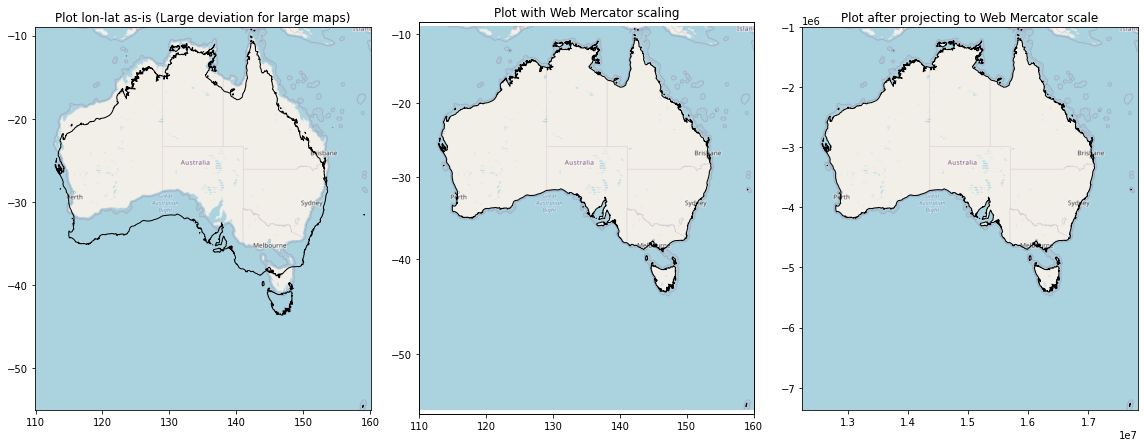

In [12]:
# Large map example
# Country polygon data from the world bank https://datacatalog.worldbank.org/search/dataset/0038272
# "World Country Polygons - Very High Definition"
import geopandas as gpd
df = gpd.read_file("WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp")
print(df.crs) # check that the data is in WGS84 or EPSG:4326 system
australia = df[df.NAME_EN == "Australia"]
bounds = (110, -9, 160, -55)

fig, ax = plt.subplots(1, 3, figsize=(16, 6.2))

draw_map(bounds, ax=ax[0])
australia.plot(ax=ax[0], facecolor="none", aspect=None)
ax[0].set_title("Plot lon-lat as-is (Large deviation for large maps)")

draw_map(bounds, ax=ax[1], scaling=True)
australia.plot(ax=ax[1], facecolor="none", aspect=None)
ax[1].set_title("Plot with Web Mercator scaling")

draw_map(bounds, ax=ax[2], extent_crs="webmap")
australia.to_crs("EPSG:3857").plot(ax=ax[2], facecolor="none", aspect=None)
ax[2].set_title("Plot after projecting to Web Mercator scale")

fig.tight_layout()

## Implementation details

### Database

- Downloaded image data are stored at the internal SQLite database at `config.dbfile`. The default location is `~/maptiles.db`.
- By reusing the stored images, we reduce the number of requests to the map tile servers.
- If you want to delete existing data, either run `initialize_database(replace=True)` or simply delete the file.
- One may change the database file location by the `set_databasefile` function.

In [13]:
import sqlite3
from maptiles import config, set_databasefile

# The database has only one table "tiles"
#   with columns "url" and "image".
with sqlite3.connect(config.dbfile) as conn:
    c = conn.cursor()
    data = c.execute("SELECT url FROM tiles LIMIT 10").fetchall()
print(data)

[('http://tiles.wmflabs.org/bw-mapnik/15/16383/10900.png',), ('http://tiles.wmflabs.org/bw-mapnik/15/16383/10901.png',), ('http://tiles.wmflabs.org/bw-mapnik/15/16384/10900.png',), ('http://tiles.wmflabs.org/bw-mapnik/15/16384/10901.png',), ('http://tiles.wmflabs.org/bw-mapnik/16/33184/22540.png',), ('http://tiles.wmflabs.org/bw-mapnik/16/33184/22541.png',), ('http://tiles.wmflabs.org/bw-mapnik/16/33184/22542.png',), ('http://tiles.wmflabs.org/bw-mapnik/16/33185/22540.png',), ('http://tiles.wmflabs.org/bw-mapnik/16/33185/22541.png',), ('http://tiles.wmflabs.org/bw-mapnik/16/33185/22542.png',)]


In [14]:
# Change the database location
set_databasefile("./temp.db")
print(config.dbfile)

./temp.db
